In [1]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Downloading required NLTK data
nltk.download("punkt")
nltk.download("stopwords")

# Function for cleaning the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Removing URLs
    text = re.sub(r"[^\w\s]", "", text)  # Removing punctuation
    text = re.sub(r"\d+", "", text)  # Removing numbers
    tokens = word_tokenize(text)  # Tokenise the text
    tokens = [word for word in tokens if word not in stopwords.words("english")]  # Removing stopwords
    return " ".join(tokens)

# Loading the sythetic data
file_path = 'C:/Users/user/OneDrive/Desktop/Jupyter_Notebook/new_synthetic.csv'
df = pd.read_csv(file_path)
df["clean_text"] = df["text"].apply(clean_text)

# Encode the 'status' column (e.g., depression=0, anxiety=1, stress=2)
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["status"])

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42)

# TF-IDF Vectorization for SVM
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Tokenization and Padding for BiLSTM
max_words = 5000
max_length = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding="post")
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length, padding="post")

# SVM Model
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds, average="weighted")

# BiLSTM Model
embedding_dim = 64
bilstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation="relu"),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation="softmax")  # Multi-class output
])
bilstm_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
bilstm_model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), epochs=5, batch_size=32)
bilstm_preds = bilstm_model.predict(X_test_seq).argmax(axis=1)
bilstm_accuracy = accuracy_score(y_test, bilstm_preds)
bilstm_f1 = f1_score(y_test, bilstm_preds, average="weighted")

# Comparing models
print("SVM Accuracy:", svm_accuracy)
print("SVM F1 Score:", svm_f1)
print("BiLSTM Accuracy:", bilstm_accuracy)
print("BiLSTM F1 Score:", bilstm_f1)

# Selecting the best model
if svm_f1 > bilstm_f1:
    best_model = svm_model
    model_type = "SVM"
    vectorizer = tfidf_vectorizer
    print("Best Model: SVM")
else:
    best_model = bilstm_model
    model_type = "BiLSTM"
    tokenizer = tokenizer
    max_length = max_length
    print("Best Model: BiLSTM")


KeyboardInterrupt



In [42]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Saving the trained SVM model
joblib.dump(svm_model, "svm_model.pkl")

# Saving the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

print("SVM model and TF-IDF vectorizer saved successfully.")


SVM model and TF-IDF vectorizer saved successfully.


In [46]:

# Loading the dataset
file_path = 'C:/Users/user/OneDrive/Desktop/Jupyter_Notebook/new_synthetic.csv'
df = pd.read_csv(file_path)

# Recreating and fit the LabelEncoder
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["status"])  

# Saving the label encoder 
joblib.dump(label_encoder, "C:/Users/user/OneDrive/Desktop/JN/label_encoder.pkl")
print("Label Encoder successfully saved!")


Label Encoder successfully saved!


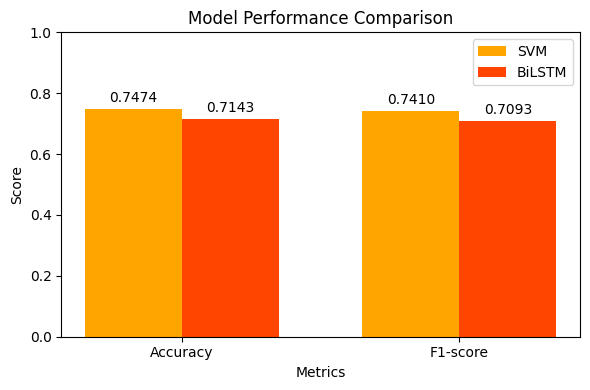

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Names of the metrics and models
metrics = ['Accuracy', 'F1-score']
svm_scores = [0.7474, 0.7410]
bilstm_scores = [0.7143, 0.7093]
# Setting position of the bars on the x-axis
x = np.arange(len(metrics))
bar_width = 0.35
# Creating grouped bar chart
fig, ax = plt.subplots(figsize=(6, 4))
# Bars for SVM and BiLSTM
bars1 = ax.bar(x - bar_width/2, svm_scores, bar_width, label='SVM', color='orange')
bars2 = ax.bar(x + bar_width/2, bilstm_scores, bar_width, label='BiLSTM', color='orangered')
# Labels and formatting
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()
# Annotating bars with scores
ax.bar_label(bars1, fmt='%.4f', padding=3)
ax.bar_label(bars2, fmt='%.4f', padding=3)

plt.tight_layout()
plt.show()


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
from shiny import App, ui, render
import pandas as pd
import re
import joblib
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Downloading required NLTK data
nltk.download("punkt")
nltk.download("stopwords")

# Load trained models and encoders
model_path = "C:/Users/user/OneDrive/Desktop/JN/svm_model.pkl"
vectorizer_path = "C:/Users/user/OneDrive/Desktop/JN/tfidf_vectorizer.pkl"
label_encoder_path = "C:/Users/user/OneDrive/Desktop/JN/label_encoder.pkl"

svm_model = joblib.load(model_path)
tfidf_vectorizer = joblib.load(vectorizer_path)
label_encoder = joblib.load(label_encoder_path)  # Load LabelEncoder

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words("english")]
    return " ".join(tokens)

# Define UI
app_ui = ui.page_fluid(
    ui.tags.style("""
        body { background: linear-gradient(to right, #1a1a2e, #16213e); color: white; font-family: 'Arial', sans-serif; padding: 20px; }
        .app-header { text-align: center; color: #ff4b5c; font-size: 42px; font-weight: bold; padding-bottom: 10px; text-shadow: 2px 2px 10px rgba(255, 75, 92, 0.8); }
        .card { background: rgba(44, 44, 84, 0.9); padding: 25px; border-radius: 15px; box-shadow: 2px 2px 15px rgba(255, 255, 255, 0.1); margin-bottom: 20px; }
        .btn-primary { background: linear-gradient(135deg, #ff4b5c, #ff6f61); border: none; font-size: 20px; padding: 12px; border-radius: 10px; width: 100%; color: white; transition: 0.3s; font-weight: bold; }
        .btn-primary:hover { background: linear-gradient(135deg, #ff3b4c, #ff514b); box-shadow: 0px 0px 15px #ff4b5c; }
        textarea { background: #222; color: white; border: 2px solid #ff4b5c; width: 100%; height: 120px; border-radius: 8px; padding: 10px; font-size: 16px; resize: vertical; }
        label { color: white !important; font-weight: bold; font-size: 18px; }
    """),
    
    ui.h1("🔍 MHD Web App", class_="app-header"),
    
    ui.div(ui.input_text_area("input_text", "📝 Enter text for detection:", height="120px"), class_="card"),
    ui.div(ui.input_action_button("predict_button", "Analyse Text", class_="btn btn-primary"), class_="card text-center"),
    ui.div(ui.output_ui("predictions"), class_="card")
)

# Define server logic
def server(input, output, session):
    @output
    @render.ui
    def predictions():
        if not input.predict_button():
            return ""

        input_text = input.input_text()
        if not input_text:
            return ui.HTML("<b style='color: white;'>Please enter some text.</b>")

        statements = input_text.strip().split("\n")
        df = pd.DataFrame({"text": statements})
        df["clean_text"] = df["text"].apply(clean_text)

        # Transform input and make predictions
        input_vectorized = tfidf_vectorizer.transform(df["clean_text"])
        numeric_predictions = svm_model.predict(input_vectorized)

        # Convert numeric predictions to labels
        df["detection"] = label_encoder.inverse_transform(numeric_predictions)

        # Format the output
        result = "<br><br>".join([
            f"<span style='color: white; font-size: 20px;'>"
            f"📌 <b>Text:</b> {row['text']} <br> 🔍 <b>Detection:</b> {row['detection']}"
            f"</span>"
            for _, row in df.iterrows()
        ])

        return ui.HTML(result)

# Create and run the Shiny app
app = App(app_ui, server)
from shiny import run_app
run_app(app)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:     Started server process [2032]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:51590 - "GET / HTTP/1.1" 200 OK


INFO:     ('127.0.0.1', 51597) - "WebSocket /websocket/" [accepted]
INFO:     connection open
